In [1]:
import numpy as np
import pandas as pd

import missingno as msn

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### TODO

1. Nulls
2. Types
3. Distributions
4. Correlations
5. PCA
6. Feature Engineering

### Raw data check/transform

In [2]:
# Load raw data
raw_data = pd.read_csv('../raw_features.csv')

In [13]:
raw_data.head(3)

,Unnamed: 0,name_x,market_cap,number_pages,number_images,number_characters,number_equations
0,0,Bitcoin,1206547874874,9,0,21807,80
1,1,Ethereum,320467809737,42,6,88334,22
2,2,Tether,115641341009,20,4,39064,8


In [4]:
# Correct errors from data gen process
raw_data_clean = raw_data.drop('Unnamed: 0', axis=1).rename(columns={'name_x': 'name'})

In [20]:
raw_data_clean.head(3)

,name,market_cap,number_pages,number_images,number_characters,number_equations
0,Bitcoin,1206547874874,9,0,21807,80
1,Ethereum,320467809737,42,6,88334,22
2,Tether,115641341009,20,4,39064,8


### Nulls

In [19]:
raw_data_clean.head(3)

,name,market_cap,number_pages,number_images,number_characters,number_equations
0,Bitcoin,1206547874874,9,0,21807,80
1,Ethereum,320467809737,42,6,88334,22
2,Tether,115641341009,20,4,39064,8


<Axes: >

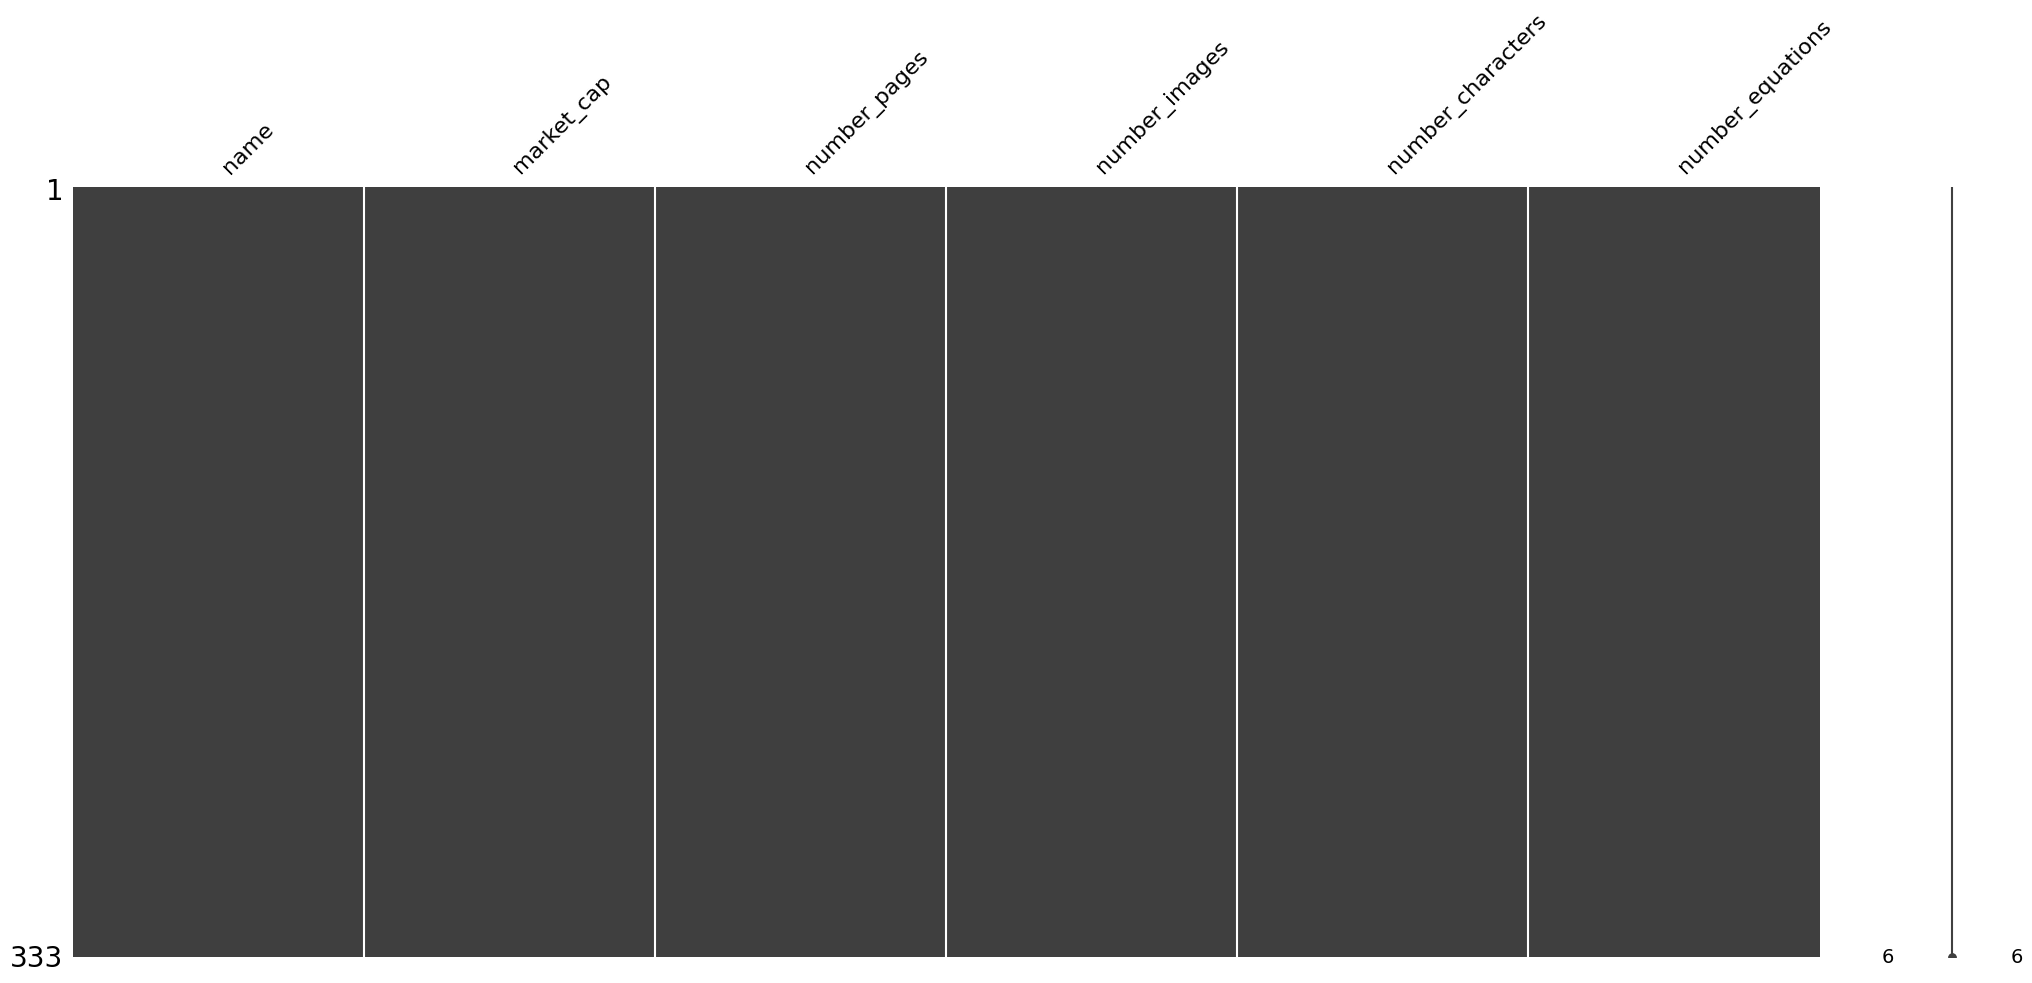

In [22]:
msn.matrix(raw_data_clean)

No nulls.

### Types

In [23]:
raw_data_clean.dtypes

name                 object
market_cap            int64
number_pages          int64
number_images         int64
number_characters     int64
number_equations      int64
dtype: object

### Distributions

In [10]:
# Get numerical columns to plot
num_cols = [col for col in raw_data_clean.columns if raw_data_clean[col].dtype != 'object']

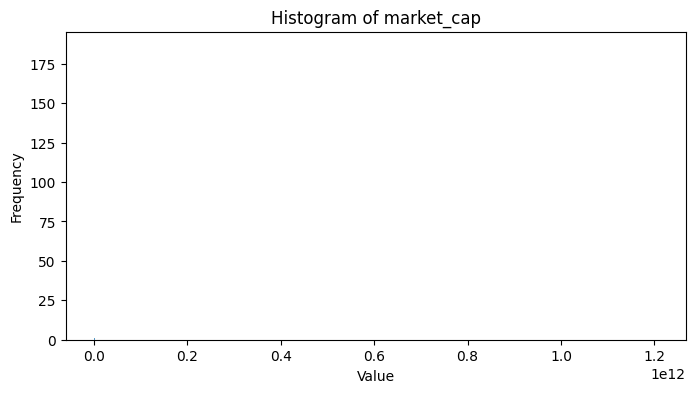

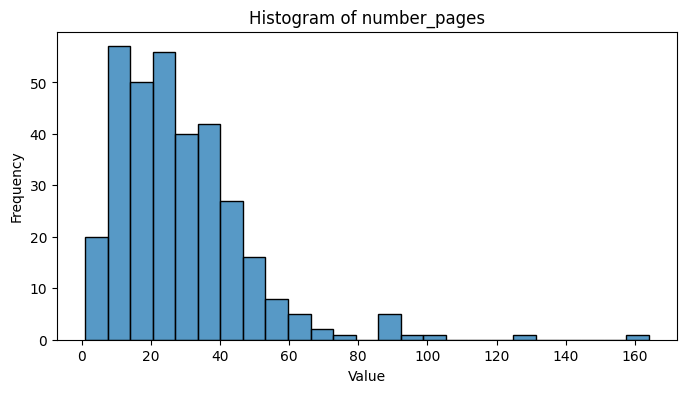

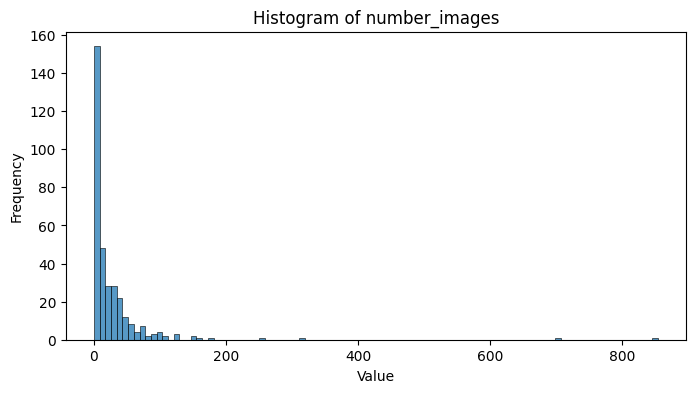

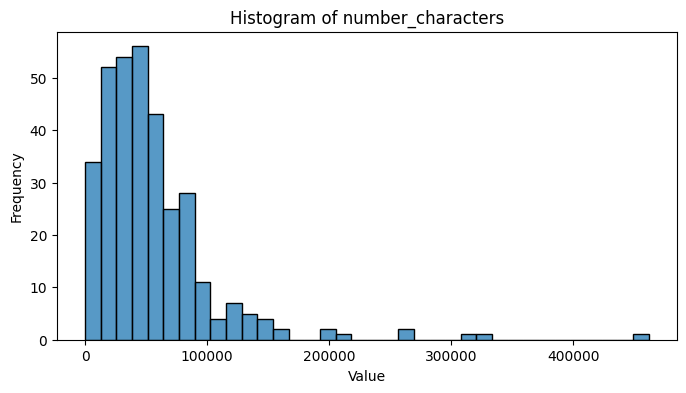

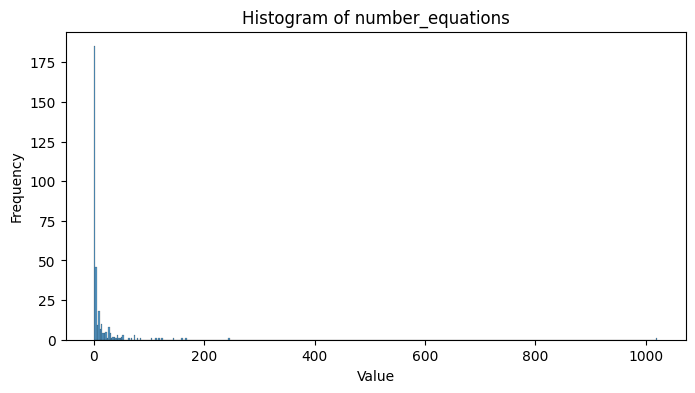

In [25]:
for column in num_cols:
    plt.figure(figsize=(8, 4))  # Set the size of each subplot
    sns.histplot(raw_data[column], kde=False)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

Very interesting distribututions!

Pages and characters seem to be log normal, equations and images more exponential.

market_cap is obviously severely long-tailed.

In [26]:
raw_data_clean.describe()

,market_cap,number_pages,number_images,number_characters,number_equations
count,3.330000e+02,333.000000,333.000000,333.000000,333.000000
mean,5.588818e+09,28.723724,27.663664,54427.165165,14.156156
std,6.871728e+10,19.540550,68.703622,49953.491211,61.411261
min,2.411600e+04,1.000000,0.000000,0.000000,0.000000
25%,1.779195e+06,15.000000,1.000000,24383.000000,0.000000
50%,2.855249e+07,26.000000,10.000000,44226.000000,2.000000
75%,1.443627e+08,38.000000,31.000000,69402.000000,9.000000
max,1.206548e+12,164.000000,854.000000,461652.000000,1021.000000


I might kill some of these anomolies...

<Axes: >

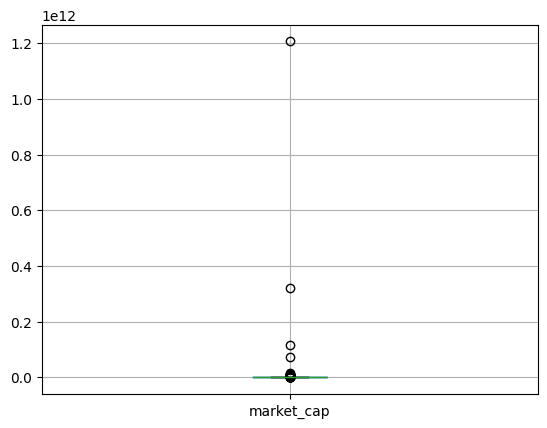

In [36]:
raw_data_clean.boxplot('market_cap')

(array([299.,  11.,   4.,   1.,   1.,   1.,   2.,   2.,   0.,   2.]),
 array([2.41160000e+04, 6.67371128e+08, 1.33471814e+09, 2.00206515e+09,
        2.66941216e+09, 3.33675917e+09, 4.00410619e+09, 4.67145320e+09,
        5.33880021e+09, 6.00614722e+09, 6.67349423e+09]),
 <BarContainer object of 10 artists>)

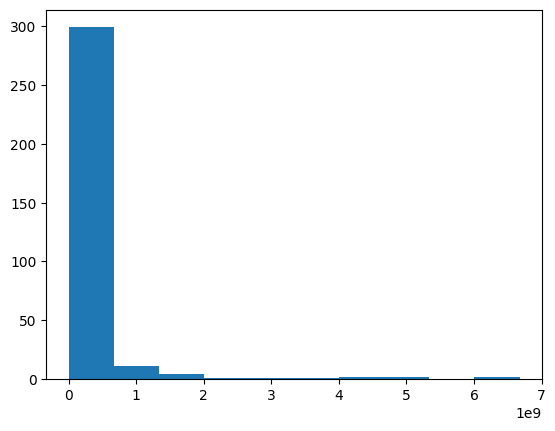

In [35]:
plt.hist(raw_data_clean['market_cap'].iloc[10:])

Clearly leptokurtic distributions hence the need to apply one of the following:

- Log-norm
- Box-Cox
- Kurtosis
- Winsorization
- Square and cube root

### Correlation

In [11]:
raw_data_clean[num_cols].corr()

,market_cap,number_pages,number_images,number_characters,number_equations
market_cap,1.000000,-0.046820,-0.024444,-0.025829,0.059708
number_pages,-0.046820,1.000000,0.127210,0.827011,0.402345
number_images,-0.024444,0.127210,1.000000,0.028589,-0.055149
number_characters,-0.025829,0.827011,0.028589,1.000000,0.540562
number_equations,0.059708,0.402345,-0.055149,0.540562,1.000000


<Axes: >

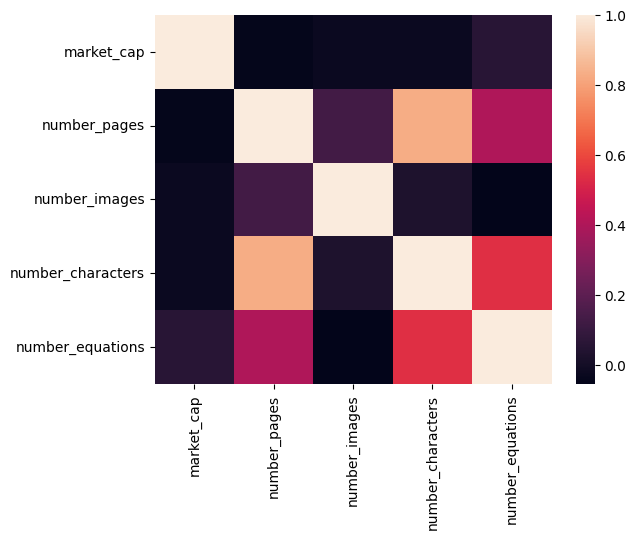

In [13]:
sns.heatmap(raw_data_clean[num_cols].corr())

### Feature Engineering

Create the following features:

- equation_density = number_equations/number_pages
- image_density = number_images/number_pages